
# Exercise: Creating Our Own Spectrogram

In this notebook we will learn how to create our own *spectrogram*.
A spectrogram is a visual representation of the frequencies in a signal (such as an audio signal) *as they vary in time*.
That is, whereas plotting the Fourier components (i.e. the Fourier spectrum) of a signal tells us what frequencies are present in the signal, a spectrogram will tell us what frequencies are present in the signal and *where/when* they occur.
This is an extremely powerful tool for signal analysis.

In [1]:
# run this cell (maybe twice to get %matplotlib notebook to work)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from microphone import record_audio
from typing import Tuple

%matplotlib notebook

## Accessing Time *and* Frequency: Building an Intuition for Spectrograms


Thus far we have seen two means for representing audio data visually. We have plotted:
1. Amplitude vs Time: Shows how the pressure from the sound wave varies over time.
2. Fourier Spectrum: Reveals the prominent frequencies that are present in the sound wave.

Let's revisit the clip of a trumpet playing a chord that we studied before.

In [2]:
import librosa

# `recorded_audio` is a numpy array of N audio samples
recorded_audio, sampling_rate = librosa.load("data/trumpet.wav", sr=44100, mono=True)

Let's play this audio clip to recall what is being played.

In [3]:
from IPython.display import Audio
Audio(recorded_audio, rate=sampling_rate)

### Revisiting the Fourier Spectrum


We'll plot both the temporal wave form/amplitude and its Fourier spectrum.
We will plot the Fourier coefficients, $|a_{k}|$, on a *log-scale*.
This is a natural scale to plot the Fourier spectrum on, as the human ear responds to loudness on a logarithmic scale (an amplitude of  4 needs to increase to an amplitude of 16 ($4^2$) in order for us to perceive a doubling in loudness).

<IPython.core.display.Javascript object>


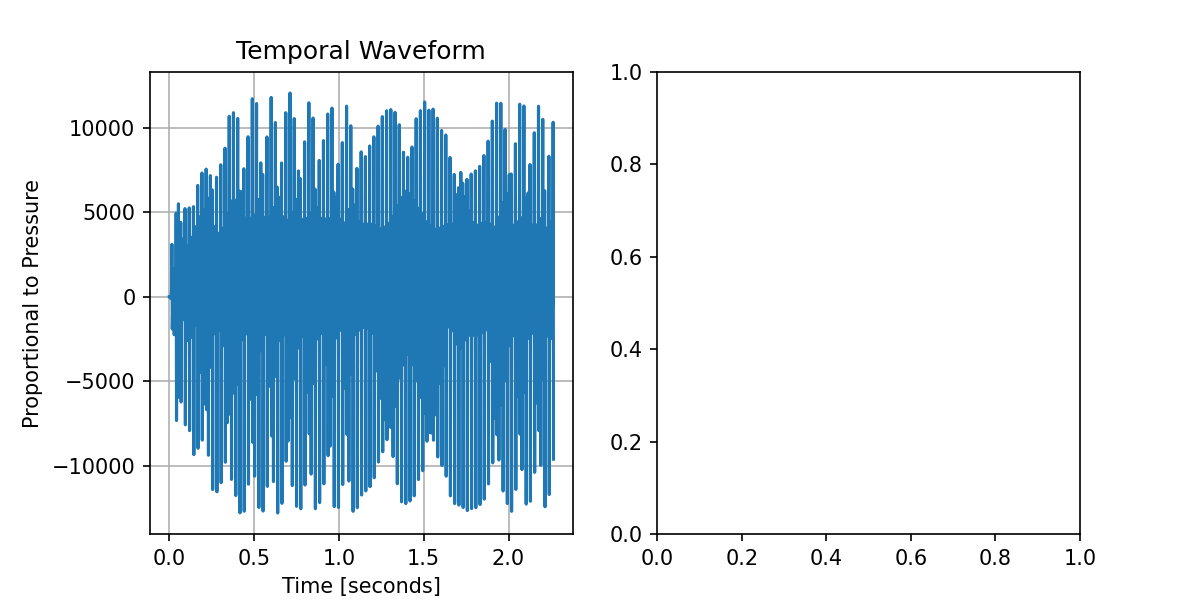

NameError: name 'fk' is not defined

In [4]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

# Compute the times at which each sample was recorded in seconds

# Define the following variable(s)
# `time`: array storing t_0, t_1, ..., t_{N-1} 
time = np.arange(len(recorded_audio)) / sampling_rate  # <COGLINE>

# Plotting the waveform (every 100th datapoint for sake of efficiency)
ax0.plot(time[::100], recorded_audio[::100])  
ax0.set_xlabel("Time [seconds]")
ax0.set_ylabel("Proportional to Pressure")
ax0.set_title("Temporal Waveform")
ax0.grid(True)


# Plotting the Fourier spectrum

# Compute the real-valued Fourier coefficents for this recording
# and the corresponding frequencies (in Hz)

# Define the following variable(s)
# `ak`: array storing the real-valued Fourier coeffs: a_0, a_1, ..., a_{N//2}
# `fk`: array storing the associated frequencies: 0/T, 1/T, ..., (N//2)/T


N = len(recorded_audio)
T = N / sampling_rate  # total time-span of audio clip

# FFT: yn -> ck   (complex-valued Fourier coefficients)



# convert ck (complex Fourier coeff) -> |ak| (real-valued coeff)



# convert k = 0, 1, ... to freq = 0, 1/T, 2/T, ..., (int(N/2) + 1)/T




ax1.plot(fk[:20000], ak[:20000])
ax1.set_title("Fourier Spectrum")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Proportional to decibels [dB]")
ax1.grid(True)
ax1.set_yscale("log")
fig.tight_layout()

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(fk[:20000], ak[:20000])
ax1.set_title("Fourier Spectrum")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Proportional to decibels [dB]")
ax1.grid(True)
#ax1.set_yscale("log")
fig.tight_layout()

### Comparing a Fourier Spectrum to a Spectrogram


See that there is a trade-off between these two representations of the data.
That is, from the waveform we can see that the trumpet is playing a relatively sustained chord for about $2.5$ seconds, while we cannot glean from the wave form what notes are being played.
The Fourier spectrum reveals very clear information about the notes being played, but reveals nothing about the duration or ordering of the notes (are they being played in unison? in sequence? for how long? etc.).

We would like to know *what frequencies* are present in our signal and *when* they occur in our signal.
A **spectrogram** plots exactly this information. Without further ado, let's use matplotlib's built-in spectrogram function to understand what this visualization represents:

In [ ]:
# using matplotlib's built-in spectrogram function
import matplotlib.mlab as mlab

fig, ax = plt.subplots()

S, freqs, times, im = ax.specgram(
    recorded_audio,
    NFFT=4096,
    Fs=sampling_rate,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
    mode='magnitude',
    scale="dB"
)
fig.colorbar(im)

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Recording")
ax.set_ylim(0, 4000);

The spectrogram displays a heat map which reflects the magnitude (i.e. absolute value) of the Fourier coefficients for a given time and frequency.
For example the yellow horizontal streak near $1000\;\mathrm{Hz}$ indicates that this frequency is prominent throughout the duration of the signal.
Note that this spectrogram function is automatically plotting these magnitudes on a log-scale, for the reasons discussed earlier.
This plot reveals that the prominent notes are being played in unison, and sustained for roughly $2.5$ seconds. We can also easily read off the frequencies of these notes.


(1.7.1) Create the function, `plot_recording`, that:

- Accepts a time-length, in seconds 
- Uses `microphone.record_audio` to record audio for that duration of time
- converts the "frames" of audio data to a numpy array, using `np.hstack([np.frombuffer(i, np.int16) for i in frames])`
- Uses `mlab.specgram` to plot the spectrogram for that recording 
- Returns the matplotlib `Figure` and `Axes` object instances that were produced by the plot

Set the $y$-limit to only plot up to $10,000\;\mathrm{Hz}$.
Don't change any of the spectrogram settings other than the data that you pass in and the sampling rate.

In [ ]:
def plot_recording(time: float) -> Tuple[plt.Figure, plt.Axes]:
    """ 
    Record audio and plot its spectrogram.
    
    Parameters
    ----------
    time : float
        The duration (seconds) to record audio for
    
    Returns
    -------
    fig, ax
        The plot objects for the spectrogram"""

    
    frames, sample_rate = record_audio(time)
    
    # STUDENT CODE
    #Fill in the hstack parameter:
    data = np.hstack(    )

    
    
    # using matplotlib's built-in spectrogram function
    fig, ax = plt.subplots()

    S, freqs, times, im = ax.specgram(
        data,
        NFFT=4096,
        Fs=sampling_rate,
        window=mlab.window_hanning,
        noverlap=4096 // 2,
        mode='magnitude'
    )
    ax.set_ylim(0, 10000)
    ax.set_xlabel("time (sec)")
    ax.set_ylabel("frequency (Hz)")
    return fig, ax


To continue building our intuition for the spectrogram, use `microphone.record_audio` to record a $5$ second clip of yourself whistling, clapping, etc.
Try varying the pitch, rhythm, etc. during the clip. Plot the clip as a spectrogram.

In [ ]:
plot_recording(5); 

You should see that the spectrogram successfully captures both the prominent frequencies present in the signal and their dynamics in time.
This is extremely useful! Now how exactly is this working?

<!-- #region -->
## Digging into Spectrograms

A spectrogram is constructed simply by dividing your signal into $M$ temporal windows, each of time-length $\Delta t$ and consisting of $N$ samples: 

\begin{equation}
(y_{n})_{\text{full recording}} \Longrightarrow
\begin{bmatrix}
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{0}} & \rightarrow  \\
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{1}}  & \rightarrow \\
    & \vdots  &\\
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{M-1}} & \rightarrow  \\
\end{bmatrix}
\end{equation}

and performing a Fourier transform on each window of the signal.
This produces a frequency spectrum for each time bin of size $\Delta t$; this makes up each column of numbers in the spectrogram:

\begin{equation}
\begin{bmatrix}
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{0}} & \rightarrow  \\
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{1}} & \rightarrow \\
    & \vdots  &\\
    \leftarrow   &  \big\{(y_{n})_{n=0}^{N-1}\big\}_{\Delta t_{M-1}} & \rightarrow  \\
\end{bmatrix} \Longrightarrow 
\begin{bmatrix}
    \leftarrow   &  \big\{(|a_{k}|)_{k=0}^{\lfloor N/2 \rfloor}\big\}_{\Delta t_{0}} & \rightarrow  \\
    \leftarrow   &  \big\{|a_{k}|)_{k=0}^{\lfloor N/2 \rfloor}\big\}_{\Delta t_{1}}  & \rightarrow \\
    & \vdots  &\\
    \leftarrow   &  \big\{|a_{k}|)_{k=0}^{\lfloor N/2 \rfloor}\big\}_{\Delta t_{M-1}} & \rightarrow  \\
\end{bmatrix} 
\end{equation}



If each temporal-window of our digital audio signal contains $N$ samples, then the Fourier transform on each window will produce $\left\lfloor\frac{N}{2}\right\rfloor + 1$ Fourier coefficients $(|a_{k}|)_{k=0}^{\lfloor N/2\rfloor}$.
Remember that we are interested in the *amplitude* of each Fourier coefficient, not its complex value, for the spectrogram.
This allows us to know what the frequency distribution is in our signal during each time-interval (a.k.a temporal window). 
The time window starts at $m\Delta t$ and ends at $(m+1)\Delta t$, for $m \in [0, 1, \dots, M-1]$.

**The *transpose* of the depicted array is what we plot in the spectrogram**: each column corresponds to one of $M$ temporal windows, and stores the Fourier spectrum of the audio recording during that time-interval.


The following function produces the same spectrogram as was plotted above, but without producing the associated plot;
let's get the spectrogram for the audio recording:
<!-- #endregion -->

In [ ]:
# obtaining the spectrogram for the trumpet wave form (again)

sampling_rate = 44100  # sampling rate in Hz

S, freqs, times = mlab.specgram(
    recorded_audio,
    NFFT=4096,
    Fs=sampling_rate,
    window=mlab.window_hanning,
    noverlap=int(4096 / 2),
    mode='magnitude'
)

`S` is the spectrogram, the 2-D array whose rows corresponds to frequencies and whose columns correspond to time.
`freqs` is an array of the frequency values corresponding to the rows, and `times` is an array of time values corresponding to the columns.

(1.7.2) Inspect the shapes of these arrays.
How many time bins, $M$, were used in the spectrogram?
How many frequency values are present in each time-bin?
Verify that the shape of `S` corresponds with the lengths of `freqs` and `times`.

In [ ]:
# STUDENT CODE 



What are the sizes of the frequency bins?
Of the time bins?
Are the bins (nearly) uniform in size?

Assign `recorded_dt` to the amount of time covered by each temporal window (i.e. a single float)

In [ ]:
# STUDENT CODE




## Creating Your Own Spectrogram

### Learning About the Sliding Window Function

`mygrad` comes with a sliding window function; this creates windowed *views* of an array at regular intervals.
Import `sliding_window_view` from `mygrad` and read its docstring or [its documentation page](https://mygrad.readthedocs.io/en/latest/generated/mygrad.sliding_window_view.html#mygrad.sliding_window_view).

In [ ]:
from mygrad import sliding_window_view

help(sliding_window_view)

<!-- #region -->
(1.7.3) Now create a 1-D NumPy array containing the integers from $0$ to $11$.
Use `sliding_window_view` to make the following windowed views:

- window size: 2, stride: 1
- window size: 2, stride: 2
- window size: 3, stride: 2
- window size: 6, stride: 3
- window size: 6, stride: 6

Note that `sliding_window_view` doesn't accept a window *size* but rather a window *shape*.
Thus if you want to make a 1-D window of size $2$ applied with a step-size of $1$, you would specify

In [ ]:
sliding_window_view(arr, window_shape=(2,), step=1)

<!-- #endregion -->

In [ ]:
from mygrad import sliding_window_view

arr = np.arange(11)

# STUDENT CODE
# A row of the array stores a single window of the data.
# The number of rows is thus the number of windows formed.
# The number of columns is the length of each window.








Study the shape and contents of the windowed arrays that you produce here.
What do the axes of the resulting array correspond to?
Use `numpy.shares_memory` to convince yourself that these arrays do not make a copy of the underlying data.
Discuss your observations with your neighbor.


(1.7.4) Now use `sliding_window_view` to create **non-overlapping** time windows of the trumpet audio signal.
Determine the appropriate window size so as to roughly match the spectrogram that we created above.
That is, make sure each of your windows include the appropriate number of samples so that your $\Delta t$ matches matplotlib's.

In [ ]:
# The desired temporal duration (seconds) of each window of audio data
window_dt = recorded_dt  # you can adjust this value later


# Compute the number of samples that should fit in each
# window, so that each temporal window has a duration of `window_dt`
# Hint: remember that the audio samples have an associated
# sampling rate of 44100 samples per second

# Define this as `window_size` (an int)

# STUDENT CODE




# Using the above window size and `sliding_window_view`, create an array 
# of non-overlapping windows of the audio data.
# What should the step-size be so that the windows are non-overlapping?

# Define `windowed_audio` to be a 2D array where each row contains the
# samples of the recording in a temporal window.
# The shape should be (M, N), where M is the number of temporal windows
# and N is the number of samples in each window

# STUDENT CODE





Look at the shape of your array. How many time windows did you create; i.e. what is $M$ equal to?
How many samples, $N$, reside in each window?
Thus what is the time duration of each window?

In [ ]:
# STUDENT CODE




Now take the discrete Fourier transform, using `np.fft.rfft`,  over each time window.
Note that `np.fft.rfft` accepts an axis argument, such that you can vectorize this operation instead of using for-loops.
Set the `axis` value so that the FFT is applied to each time-window, respectively.
Take the absolute value of the output to convert the complex-valued Fourier coefficients into real-valued magnitudes.

Do the rows and columns of the array that you have just computed correspond to what we want for our spectrogram? That is, do our rows correspond to frequencies, and columns correspond to times?
Update your array so that they do.

In [ ]:
# STUDENT CODE




Compute the duration of the *full* audio signal in seconds, given that the sampling rate used to record it was $44,100\;\mathrm{Hz}$.
Assign this to `T`.

In [ ]:
# STUDENT CODE



Compute the maximum frequency included in the Fourier spectrum for any of the given temporal windows. 
Assign this float value to `F`.

In [ ]:
# STUDENT CODE



Time to plot our spectrogram!
We will make use of `T` and `F` to set the scales for our plot axes, and to set a sensible aspect ratio for the plot.

In [ ]:
# Plug your spectrogram array in `imshow` and execute this cell
# notes that we set `origin="lower"` in the `imshow function, this is
# so the low frequencies occur at the bottom of the y axis; this is flipped
# from how your array is structured

max_freq = 4000  # the largest frequency that we want to plot

# this is used to set the (left, right, bottom, top) scale for the image axes
extent = (0, T, 0, F)
aspect_ratio = T / max_freq

fig, ax = plt.subplots()
ax.imshow(
    np.log(spectrogram),
    origin="lower",
    aspect=aspect_ratio,
    extent=extent,
    interpolation="bilinear",
)
ax.set_ylim(0, max_freq)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Frequency (Hz)")

Notice that, to mimic the original spectrogram plot, we are plotting the *logarithm* of the Fourier amplitudes, so that these values correspond to audible decibels.


This plot should resemble that of the original spectrogram quite closely.
There are some special considerations to take in order to ensure that the boundaries between time bins are handled well – not accounting for these introduces significant artifacts into the spectrogram.
Matplotlib's spectrogram looks much cleaner than ours because they use nice techniques, like the application of a "hamming window", to stitch together the Fourier spectra over time.

At its core though, a spectrogram is as simple as applying a Fourier transform on time-windowed bins of the signal, and plotting the resulting Fourier coefficient amplitudes as the columns of a frequency vs time plot, with each column corresponding to a time window of the signal.

- col-0 : Fourier spectrum of signal during $\Delta t_0$ 
- col-1 : Fourier spectrum of signal during $\Delta t_1$ 
- $\vdots$


To improve the quality of your spectrogram, you can try doubling the window size, but keeping the same stride.
Thus the windows will partially overlap, which will help to mitigate the effects of the artificial boundaries that we introduced in our windowing.